<a href="https://colab.research.google.com/github/AvyayaJha/Diamonds-Research-Project/blob/main/(Report)%20Diamonds_Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The Limited Influence of Cut, Color, and Clarity on Diamond Pricing Compared to Carat Weight**
###A Study by Avyaya Jha  
####With Mentorship from Sujay Shetty

---

  




##**Abstract**

###Problem:
Cut, color, clarity, and carat weight (the 4Cs) are said to be the dictators of diamond pricing, equally contributing to a diamond's price. However, there is little evidence that color, cut, and clarity impact price as significantly as carat. In this study, I aim to uncover the truth about diamond pricing and determine whether these categorical features have a substantial impact.

###Approach:

I focused on the columns of cut, color, clarity, carat, and price while using Ordinal and Dummy-Variable encoding methods to turn categorical variables into a numeric format, dropping one base level to avoid multicollinearity when needed. I developed a Null and Alternative Hypothesis, set a significance value of 5%, and utilized ANOVA and Tukey HSD tests to provide P-significance metrics, measuring significant price changes across enclosed levels of cut, color, and clarity level. I used a regression model to test the predictability of the 3Cs, tested limiting diamond price, and evaluated the model using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R².

###Results:
Tests indicated that 90% of 3Cs level changes had a significant impact on average price; however, they also showed that average price decreases as quality levels improve, which is counterintuitive. Correlation heatmaps show that even though features may be significant, the 3Cs have little correlation with price (r between 0 and -0.2) while carat has a strong correlation (r = 0.92). Regression model results indicate that the predictive power of the 3Cs is weak (R² of 0.048 and 0.054), only explaining around  5% of price variation.

###Conclusion:
Through this research, I found that cut, color, and clarity have a statistically significant impact on price; however, there is little correlation or predictive power. Through visual evidence, we see how these features do not equally contribute to price like the 4Cs traditionally convey. Instead, carat weight dominates price. These findings suggest the conventional belief of perceived value in the 3Cs is essentially a construct of the diamond industry's marketing, rather than a data-backed reality.



---






#**Background**

Traditionally, diamond pricing is said to be dictated by the 4Cs. However, my Exploratory Data Analysis (EDA) revealed different results: carat had a high correlation to price, while the features of color, cut, and clarity showed surprisingly weak correlations. These observations challenged the conventional thought of diamond pricing. Is the diamond industry overstating the importance of certain diamond features?

Testing the data with statistical methods will show us how the 4Cs impact price. A result that reveals the 4Cs model's inaccuracy will identify a source of misinformation for diamond consumers. A finding that can help buyers make better financial decisions by prioritizing price-impacting diamond characteristics while simultaneously challenging industry assumptions.

Research Question: Why do cut, color, and clarity have such a weak impact on diamond pricing? Moreover, how can we use different encoding methods and samples to improve the impact?

Hypothesis: Cut, color, and clarity have little impact on the price of a diamond compared to carat weight.

---



#**Results**

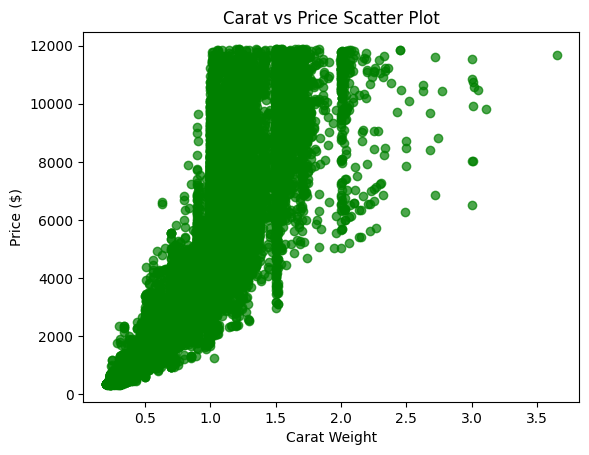

Graph displaying the relationship between price and carat weight (1 Carat = 200 milligrams). Pricier diamonds tend to be higher carat.

---



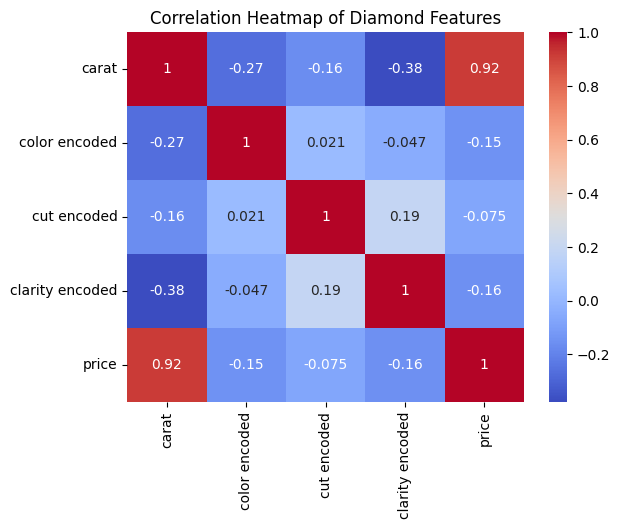

The heatmap illustrates the correlation of 4Cs versus price. Red boxes depict more correlated relationships, while blue boxes indicate weaker relationships.

We see that carat has a very high correlation (0.92) while cut, color, and clarity have weak correlations (between -0.2 and 0).

---

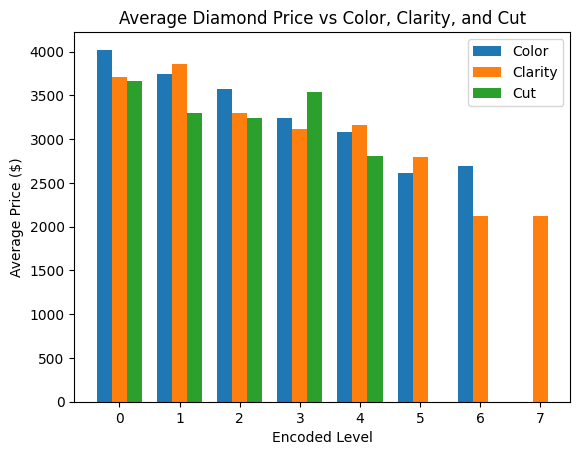

The bar graph illustrates ANOVA and Tukey HSD related test results. 90% of level changes are statistically significant, indicating that cut, color, and clarity have a significant impact on price. Interestingly, the graph shows a negative trend for greater-quality 3Cs.

---

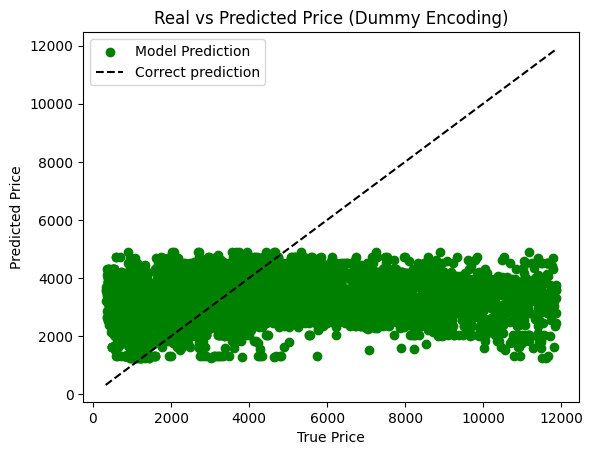

Linear regression model using dummy variable encoding. The scatterplot illustrates the weak predictive power of the 3Cs with an R² score of 0.0534, an MSE of 7,151,147 USD, and an MAE of 2,078 USD.


---

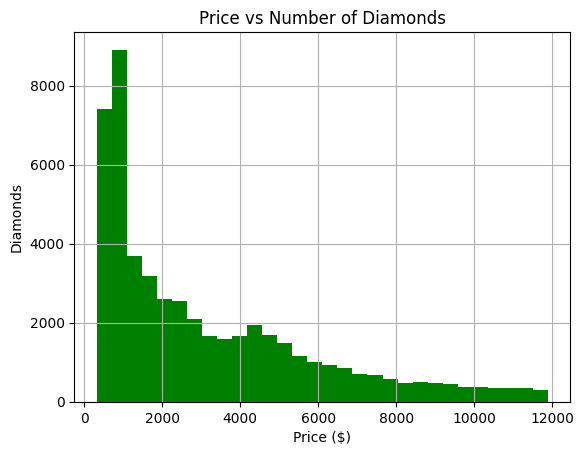

The histogram shows the distribution of prices in the dataset, suggesting that larger price values may affect the predictability of cut, color, and clarity by skewing the model.

---

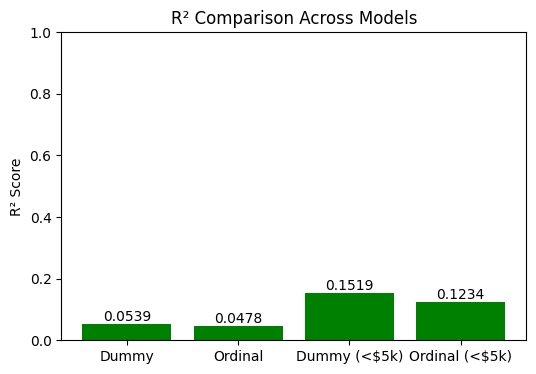

The bar graph displays R² metrics for all four machine learning models tested, indicating that limiting large prices does not improve the predictability of cut, color, and clarity substantially.



---



#**Discussion**

Data visualizations and evaluations of the Diamond dataset highlight the importance of certain diamond pricing features. They suggest that diamond pricing is not based on the conventional 4Cs, but rather on a skewed impact of carat versus cut, color, and clarity. This supports my original hypothesis, which stated that the 3Cs have a weak impact on price. These findings confirmed my claims, while also revealing a more drastic effect than expected. In ANOVA & Tukey HSD tests, better cut, color, and clarity levels were shown to reduce the average price. This could be because larger diamonds typically sacrifice cut, color, and clarity for carat weight, which drives price the most. Due to this trade-off, the higher quality 3Cs values are often priced less on average.

Conclusions from this project challenge traditional beliefs about the 4Cs. The price of a diamond is more nuanced than buyers believe, and it is important to challenge the accuracy of the 4Cs diamond marketing. Otherwise, buyers might be overpaying for attributes that do not increase the price.

---

Although results indicate that my early hypothesis on 4Cs price impacts is valid, it is equally important to consider where the data was collected. Understanding the dataset's composition helps provide possible reasons for this outcome.

###Understanding the Data / Limitations of this Study

1. Data was collected over many years, inflation and changes in the diamond market can impact specific metrics

2. Unclear whether diamonds in the dataset can be lab-grown or natural, which could be an unknown variable of price

3. Ambiguity of dataset: What country was the data collected in? Who collected the data? These challenge the data's authenticity and subsequent use cases.

Overall, the conclusions of this study are well-supported: the data is sourced from the well-known Kaggle Diamond Dataset, is labeled correctly, and has thousands of entries.

---

###Key questions for further research include:

1. Why are better clarity, cut, and color values devaluing a diamond's average price?

2. How do other diamond attributes, such as certification type, fluorescence, or diamond shape, contrast with the 4Cs when looking at price?

Taking steps to address these issues can improve the credibility of my findings while helping people better comprehend the relationship the 4Cs have on diamond price. Some methods include exploring price patterns at various feature levels and implementing different models with additional diamond attributes.

---

#**Code and Data Availability**

Below, I have provided my GitHub Repository link containing all of my code regarding this project, along with a link to the Kaggle site from which I collected my data.

####GitHub Repository:

https://github.com/AvyayaJha/Diamonds-Research-Project.git

####Diamond Dataset from Kaggle:
https://www.kaggle.com/datasets/shivam2503/diamonds/data



---



#**Acknowledgements**

I want to acknowledge Sujay Shetty for mentoring me through my project, along with Abhishek Rithik Origanti for troubleshooting help and support. I would also like to thank The Coding School for the incredible learning experience that gave me the tools to produce this study. Your help made a massive difference for my project, and for that, I am forever grateful.



---

